In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.MastodonFunctions import xml_features, csv_features, ordering_tracks, smoothing_filter, peak_detection, bulk_peak_analysis

# FGF In vitro Data

### Upload the xlsx files

In [2]:
psm4 = [[2, 4, 7, 16, 24, 29, 31, 32, 33, 37, 48, 38, 40, 41, 45, 48, 49], 
       [38, 40, 41, 45, 48, 49],
       [50, 53, 55, 57, 58, 61, 64, 65, 67, 68, 71, 73],
       [2, 6, 7, 10, 24, 25, 27, 31, 33, 35, 36, 40, 43, 46, 48]]

psm4_fgf = [[53, 55, 56, 57, 58, 59, 61, 62, 63, 65, 69, 70, 76, 79, 81, 82, 84, 98, 102, 104, 108], 
            [52, 54, 55, 59, 61],
            [87, 90, 91, 93, 95, 98, 101, 104, 105, 107, 108],
            [54, 55, 56, 60, 61, 62, 63, 67, 68, 69, 70, 71, 76, 79, 94, 97, 105]]

In [3]:
experiments = [436, 443, 444, 433]

data_looping = [] # looping intensities
data_heidi = [] # heidi intensities
tod = [] # time of death
positions = []

label = [] # PSM4, FGF or none

for i, exp in enumerate(experiments):
    # Read the excel files - each sheet contains the looping or heidi intensities
    looping = pd.read_excel(f'../Data/FGF/wsc{exp}_mean_intensities_2022.xlsx', 
                            sheet_name = 'looping', header=[0])

    heidi = pd.read_excel(f'../Data/FGF/wsc{exp}_mean_intensities_2022.xlsx', 
                            sheet_name = 'heidi', header=[0])
    
    # Each experiment contains different cell positions
    positions.append(looping.keys().to_numpy()[1:])
    
    for pos in positions[i]:

        data_looping.append(looping[pos][1:].to_numpy())
        data_heidi.append(heidi[pos][1:].to_numpy())
        tod.append(looping[pos][0])
        
        if any(pos == np.array(psm4[i])):
            label.append('psm4')
        elif any(pos == np.array(psm4_fgf[i])):
            label.append('fgf')
        else:
            label.append('other')

n_cells = len(data_heidi)
looping.head() 

,position,2,6,7,10,24,25,27,31,33,...,67,68,69,70,71,76,79,94,97,105
0,TOD,67.000000,96.000000,78.000000,34.000000,62.000000,49.000000,48.000000,57.000000,56.000000,...,89.000000,87.000000,102.000000,121.000000,81.000000,49.000000,85.000000,60.000000,121.000000,121.000000
1,NaN,1124.608209,1113.306604,1157.834696,1113.533578,1144.284841,1134.995511,1109.366857,1151.278375,1136.839888,...,1105.369312,1223.439614,1132.674112,1112.731651,1156.412776,1159.939159,1126.243306,1123.891282,1133.910323,1163.630667
2,NaN,1184.880208,1170.239281,1186.582198,1152.308733,1171.918536,1248.068510,1136.544332,1200.523515,1149.974970,...,1102.378378,1258.888199,1145.122056,1106.761749,1202.491613,1203.380208,1137.211513,1201.383516,1127.926856,1187.427313
3,NaN,1176.413366,1200.920520,1241.033210,1358.415916,1167.230216,1466.799292,1171.849802,1239.163484,1167.107649,...,1129.124675,1240.583208,1158.689620,1111.563492,1199.661710,1163.808126,1129.246725,1211.403750,1124.945759,1170.970458
4,NaN,1172.209476,1166.420989,1268.540936,1451.276265,1172.391711,1603.680572,1141.747909,1272.262937,1139.220452,...,1138.324655,1207.305671,1159.585487,1111.191721,1163.326829,1193.938776,1141.762673,1210.366180,1138.900277,1240.509021


### Plot the results - PSM4 and PSM4 + FGF only

In [4]:
import warnings
warnings.filterwarnings("ignore")

#### PSM4 

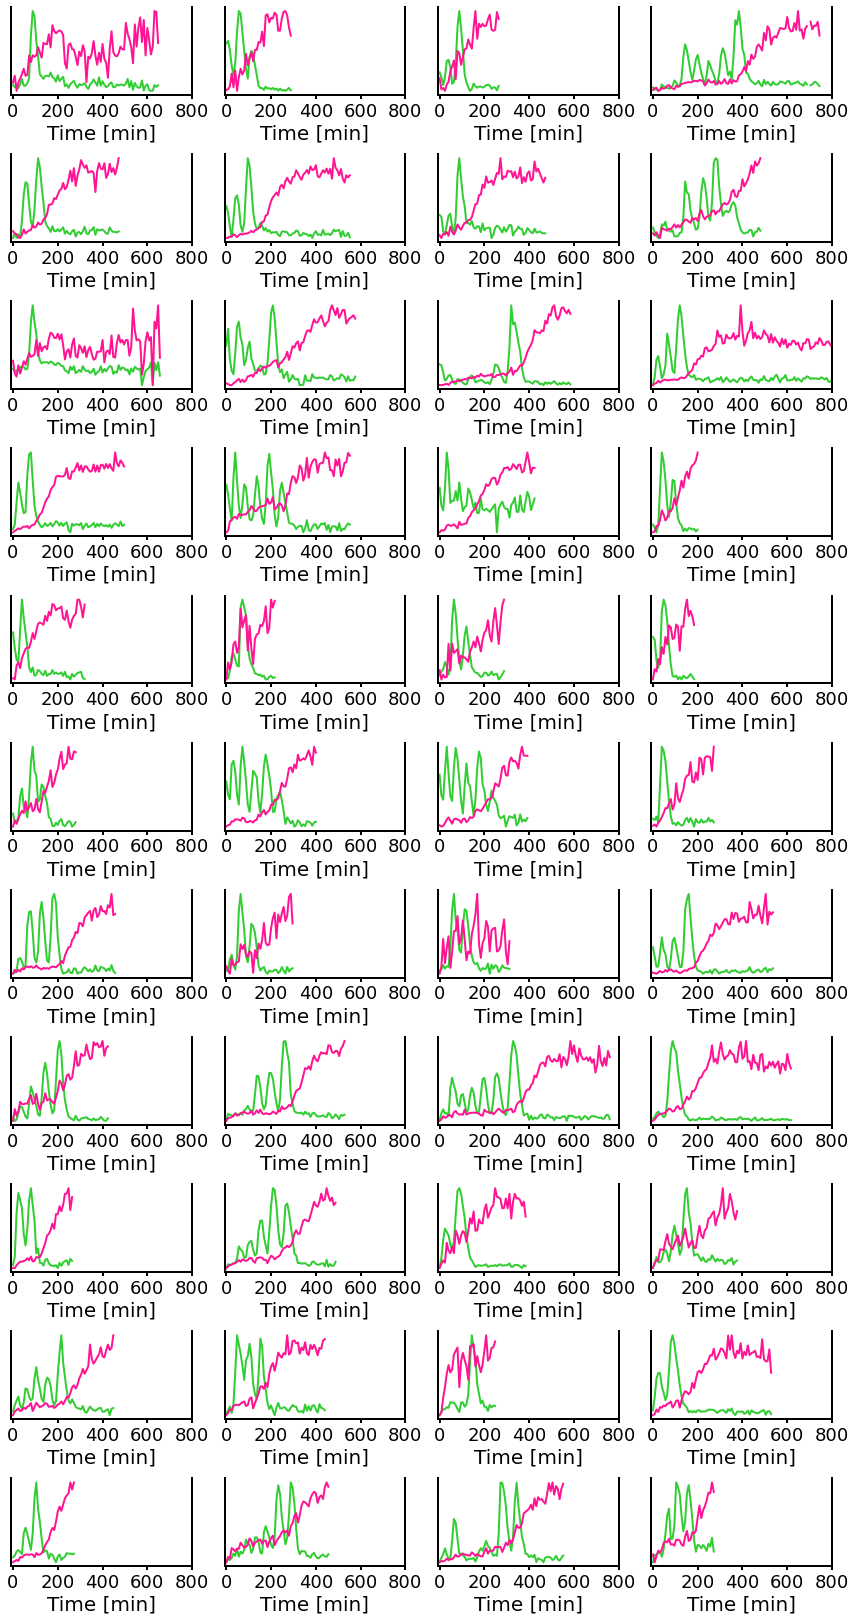

In [5]:
n_cols =  4
n_rows = np.ceil((label.count('psm4') + 1) / n_cols)
plot_num = 1

# Initialize the figure size
size_x = 3*n_cols
size_y = 2*n_rows

fig = plt.figure(figsize=[size_x,size_y])

tr = 10 # minutes
for i in range(n_cells):
    
    if label[i] == 'psm4':
        # Update the number of subplots    
        ax1 = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1

        ax1.plot(np.arange(len(data_looping[i]))*tr, data_looping[i], 
                linewidth=2, color='limegreen')

        ax2=ax1.twinx()

        ax2.plot(np.arange(len(data_heidi[i]))*tr, data_heidi[i], 
                linewidth=2, color='deeppink')

        ax1.set_xlabel('Time [min]', fontsize=20)
        ax1.set_xticklabels(np.arange(0,1200,200), fontsize=18)
        ax1.set_xticks(np.arange(0,1500,250))
        ax1.set_xlim([-10,1000])
        ax1.tick_params(width=2, length=4)
        ax1.spines['top'].set_linewidth(0)
        ax2.spines['top'].set_linewidth(0)
        ax1.spines['bottom'].set_linewidth(2)
        ax1.spines['left'].set_linewidth(2)
        ax2.spines['right'].set_linewidth(2)

        ax1.set_yticklabels([])
        ax1.set_yticks([])

        ax2.set_yticklabels([])
        ax2.set_yticks([])
    
plt.tight_layout()
plt.show()

#### PSM4 + FGF

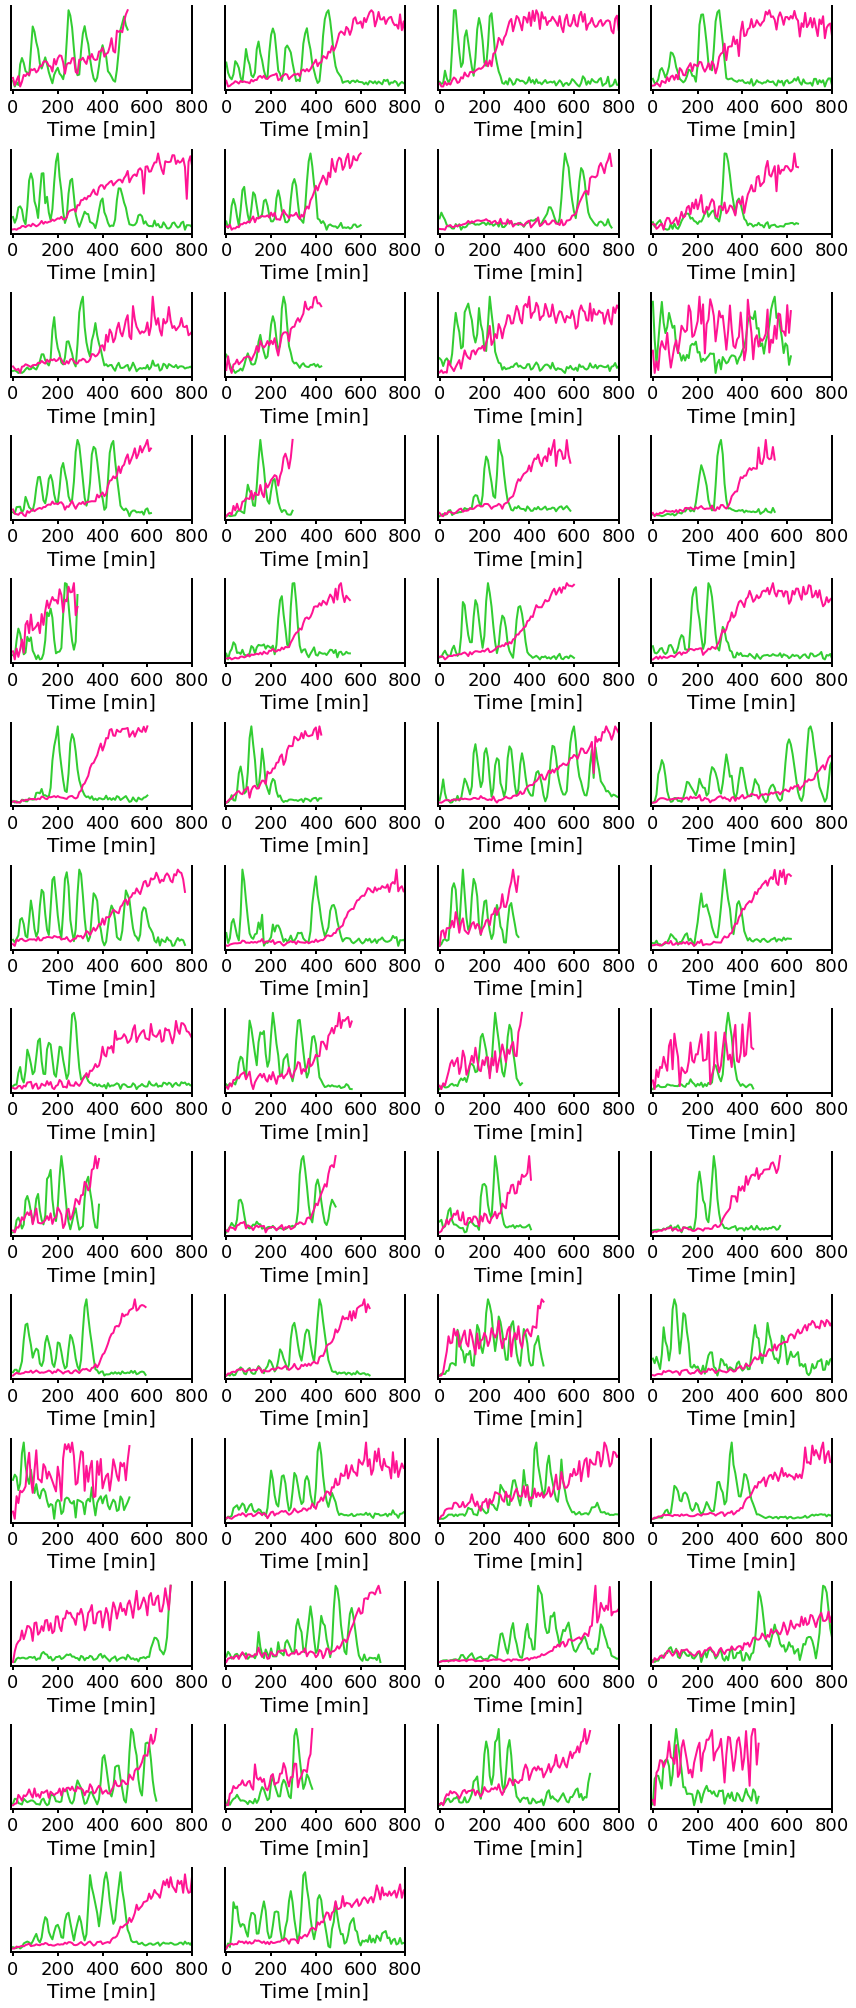

In [6]:
n_cols =  4
n_rows = np.ceil((label.count('fgf') + 1) / n_cols)
plot_num = 1

# Initialize the figure size
size_x = 3*n_cols
size_y = 2*n_rows

fig = plt.figure(figsize=[size_x,size_y])

tr = 10 # minutes
for i in range(n_cells):
    
    if label[i] == 'fgf':
        # Update the number of subplots    
        ax1 = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1

        ax1.plot(np.arange(len(data_looping[i]))*tr, data_looping[i], 
                linewidth=2, color='limegreen')

        ax2=ax1.twinx()

        ax2.plot(np.arange(len(data_heidi[i]))*tr, data_heidi[i], 
                linewidth=2, color='deeppink')

        ax1.set_xlabel('Time [min]', fontsize=20)
        ax1.set_xticklabels(np.arange(0,1200,200), fontsize=18)
        ax1.set_xticks(np.arange(0,1500,250))
        ax1.set_xlim([-10,1000])
        ax1.tick_params(width=2, length=4)
        ax1.spines['top'].set_linewidth(0)
        ax2.spines['top'].set_linewidth(0)
        ax1.spines['bottom'].set_linewidth(2)
        ax1.spines['left'].set_linewidth(2)
        ax2.spines['right'].set_linewidth(2)

        ax1.set_yticklabels([])
        ax1.set_yticks([])

        ax2.set_yticklabels([])
        ax2.set_yticks([])
    
plt.tight_layout()
plt.show()

### Peak detection - automatic

In [7]:
# Peak detection parameters

# Threshold
th_val = 0.5 # For maxima
th_val_ = 0 # For minima

# Prominence
prominence_val = 15 # For maxima
prominence_val_ = 8 # For minima

# Width
width_val = 2 # For maxima
width_val_ = 2 # For minima

# Distance
dist_val = 1 # For maxima
dist_val_ = 1 # For minima

# Averaging window size
window = 6

# If you want ts and as analysis: 'ts_as', ow no_ts_as
analysis = 'no_ts_as'

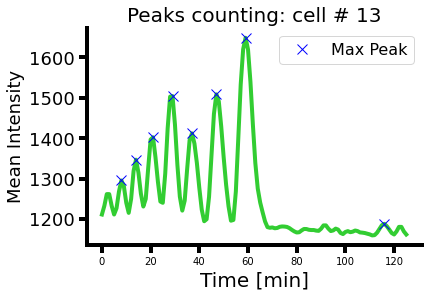

In [8]:
# Example cell
fig = plt.figure(figsize=[6,4])

i = 12

looping = data_looping[i][~np.isnan(data_looping[i])]
heidi = data_heidi[i][~np.isnan(data_heidi[i])]

peaks = peak_detection(looping, window, th_val, th_val_, \
                       dist_val, dist_val_, prominence_val,prominence_val_, width_val, width_val_, analysis)


# Correct for the last peak in case it was not detected:
y = smoothing_filter(looping, window)

plt.plot(y, color='limegreen', linewidth=4)
plt.plot(peaks.peaks, y[peaks.peaks], "x", color='blue', markersize=10, label='Max Peak'); 
plt.legend(fontsize=16)
plt.title('Peaks counting: cell # %d'%(i+1), fontsize = 20)
plt.xlabel('Time [min]', fontsize=20)
#plt.xticks(np.arange(0,50,10), map(int,np.arange(0,50,10)*10), fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Mean Intensity', fontsize=18)
#plt.xlim([10,200])
#plt.ylim([100,600])

ax = plt.gca()
ax.tick_params(width=4, length=8)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(0)

plt.show()
#fig.savefig('../Data/Figure 2/Figure 2C/ExamplePeaksDetectionCell.pdf', format='pdf', bbox_inches='tight')

#### PSM4 Peaks

In [9]:
# Peak detection parameters

# Threshold
th_val = 0.8 # For maxima
th_val_ = 0.8 # For minima

# Prominence
prominence_val = 35 # For maxima
prominence_val_ = 35 # For minima

# Width
width_val = 2 # For maxima
width_val_ = 2 # For minima

# Distance
dist_val = 1 # For maxima
dist_val_ = 1 # For minima

# Averaging window size
window = 5

# If you want ts and as analysis: 'ts_as', ow no_ts_as
analysis = 'no_ts_as'

No peaks detected
No peaks detected
No peaks detected
No peaks detected


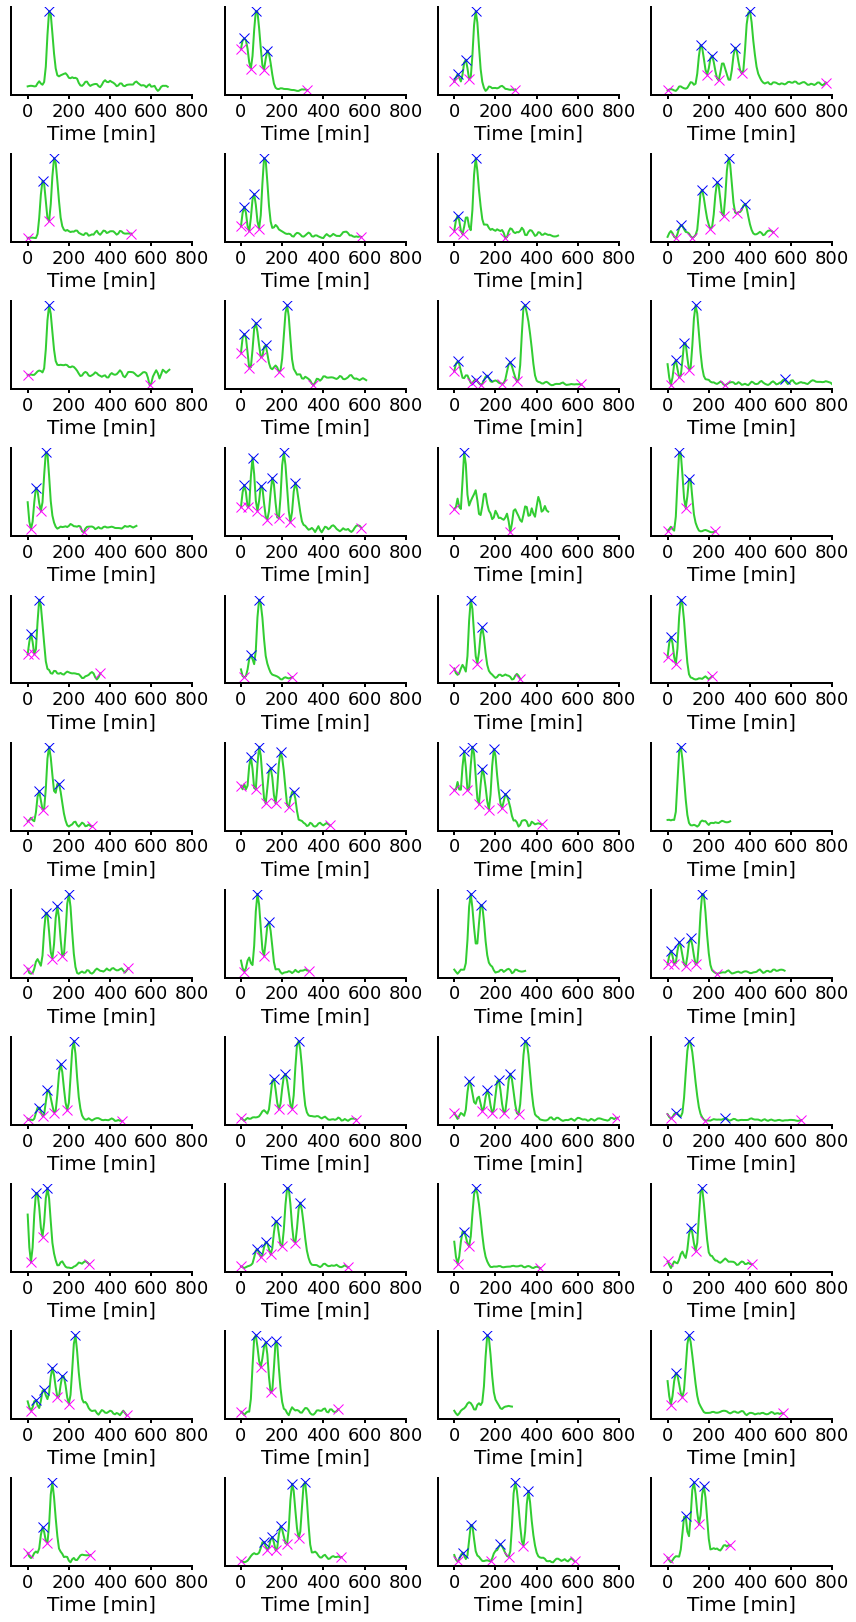

In [10]:
#### n_cols =  4
n_rows = np.ceil((label.count('psm4') + 1) / n_cols)
plot_num = 1

# Initialize the figure size
size_x = 3*n_cols
size_y = 2*n_rows

fig = plt.figure(figsize=[size_x,size_y])

n_peaks_psm4 = []

tr = 10 # minutes
for i in range(n_cells):
    
    if label[i] == 'psm4':
        # Update the number of subplots    
        ax1 = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1

        looping = data_looping[i][~np.isnan(data_looping[i])]
        peaks = peak_detection(looping, window, th_val, th_val_, \
                           dist_val, dist_val_, prominence_val, prominence_val_, width_val, width_val_, analysis)

        n_peaks_psm4.append(len(peaks.peaks))

        # Correct for the last peak in case it was not detected:
        y = smoothing_filter(looping, window)

        ax1.plot(y, linewidth=2, color='limegreen')
        ax1.plot(peaks.peaks, y[peaks.peaks], "x", color='blue', markersize=10)
        ax1.plot(peaks.peaks_, y[peaks.peaks_], "x", color='magenta', markersize=10)
        ax1.set_xlabel('Time [min]', fontsize=20)
        ax1.set_xticklabels(np.arange(0,1200,200), fontsize=18)
        ax1.set_xticks(np.arange(0,150,25))
        ax1.set_xlim([-10,100])
        ax1.tick_params(width=2, length=4)
        ax1.spines['top'].set_linewidth(0)
        ax1.spines['bottom'].set_linewidth(2)
        ax1.spines['left'].set_linewidth(2)
        ax1.spines['right'].set_linewidth(0)


        ax1.set_yticklabels([])
        ax1.set_yticks([])

plt.tight_layout()
plt.show()

#### FGF

No peaks detected


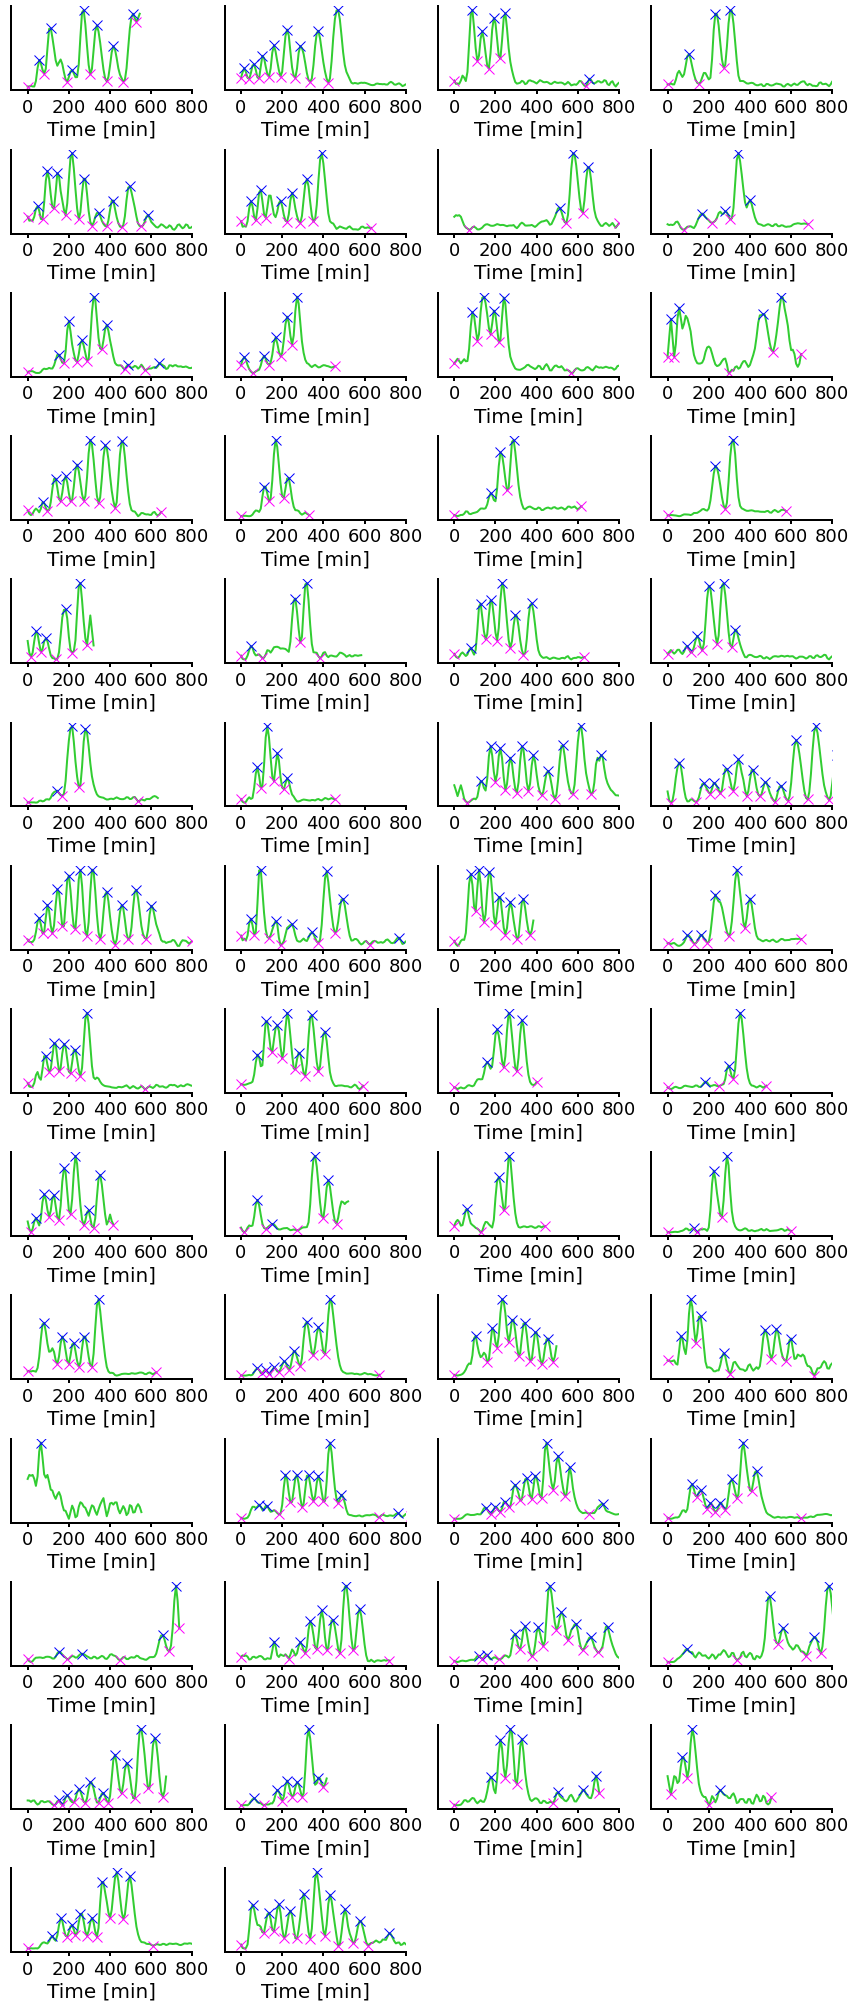

In [11]:
#### n_cols =  4
n_rows = np.ceil((label.count('fgf') + 1) / n_cols)
plot_num = 1

# Initialize the figure size
size_x = 3*n_cols
size_y = 2*n_rows

fig = plt.figure(figsize=[size_x,size_y])

n_peaks_fgf = []

tr = 10 # minutes
for i in range(n_cells):
    
    if label[i] == 'fgf':
        # Update the number of subplots    
        ax1 = plt.subplot(int(n_rows), n_cols, plot_num)
        plot_num += 1

        looping = data_looping[i][~np.isnan(data_looping[i])]
        peaks = peak_detection(looping, window, th_val, th_val_, \
                           dist_val, dist_val_, prominence_val, prominence_val_, width_val, width_val_, analysis)

        n_peaks_fgf.append(len(peaks.peaks))

        # Correct for the last peak in case it was not detected:
        y = smoothing_filter(looping, window)

        ax1.plot(y, linewidth=2, color='limegreen')
        ax1.plot(peaks.peaks, y[peaks.peaks], "x", color='blue', markersize=10)
        ax1.plot(peaks.peaks_, y[peaks.peaks_], "x", color='magenta', markersize=10)
        ax1.set_xlabel('Time [min]', fontsize=20)
        ax1.set_xticklabels(np.arange(0,1200,200), fontsize=18)
        ax1.set_xticks(np.arange(0,150,25))
        ax1.set_xlim([-10,100])
        ax1.tick_params(width=2, length=4)
        ax1.spines['top'].set_linewidth(0)
        ax1.spines['bottom'].set_linewidth(2)
        ax1.spines['left'].set_linewidth(2)
        ax1.spines['right'].set_linewidth(0)


        ax1.set_yticklabels([])
        ax1.set_yticks([])

plt.tight_layout()
plt.show()

In [12]:
n_peaks = [n_peaks_psm4, n_peaks_fgf]
percentage_all = []

for j in range(2):
    unique_peaks = np.unique(n_peaks[j])

    percentage = np.zeros_like(unique_peaks)

    for i,val in enumerate(unique_peaks):
        percentage[i] = len(np.where(np.array(n_peaks[j]) == val)[0])
    
    percentage_all.append(percentage)

In [13]:
percent_cells_psm4 = pd.DataFrame({'Total': percentage_all[0]})
percent_cells_fgf = pd.DataFrame({'Total': percentage_all[1]})

### Percentage of number of peaks

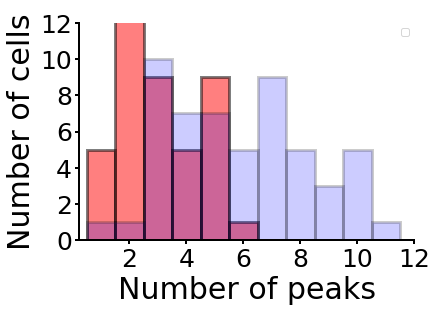

In [14]:
fig, ax = plt.subplots(figsize=[6,4])

percent_cells_psm4.plot.bar(rot=0, subplots=True, color='red', edgecolor='black', 
                           linewidth=3, width=1, ax=ax, alpha=0.5)

percent_cells_fgf.plot.bar(rot=0, subplots=True, color='blue', edgecolor='black', 
                           linewidth=3, width=1, ax=ax, alpha=0.2)

plt.xticks(np.arange(1,13,2), np.arange(2,14,2), fontsize=25)
plt.yticks(fontsize=25)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=30)
plt.ylabel('Number of cells', fontsize=30)
plt.ylim([0, 12])
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

#fig.savefig('../Data/Figure 2/Figure 2 - In vitro/Results/PeakHistogram-invitro.pdf', format='pdf', bbox_inches='tight')

#print('Mean: %g'%np.average(np.arange(1,10,1), weights=percent_cells_pd2['Total %']))
#print('Standard Deviation: %g'%np.sqrt(np.cov(np.arange(1,10,1), aweights=percent_cells_pd2['Total %'])))

In [15]:
np.mean(n_peaks_fgf)

5.87037037037037

In [16]:
np.median(n_peaks_psm4)

3.0

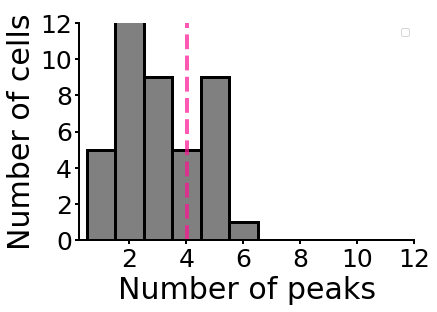

In [17]:
fig, ax = plt.subplots(figsize=[6,4])

percent_cells_psm4.plot.bar(rot=0, subplots=True, color='grey', edgecolor='black', 
                           linewidth=3, width=1, ax=ax, alpha=1)

plt.axvline(np.mean(n_peaks_psm4), linewidth=4, color='deeppink', alpha=0.7, 
           linestyle='dashed')

plt.xticks(np.arange(1,13,2), np.arange(2,14,2), fontsize=25)
plt.yticks(fontsize=25)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=30)
plt.ylabel('Number of cells', fontsize=30)
plt.ylim([0, 12])
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

#fig.savefig('../Data/Figure 2/Figure 2 - In vitro/Results/PeakHistogram-invitro.pdf', format='pdf', bbox_inches='tight')

#print('Mean: %g'%np.average(np.arange(1,10,1), weights=percent_cells_pd2['Total %']))
#print('Standard Deviation: %g'%np.sqrt(np.cov(np.arange(1,10,1), aweights=percent_cells_pd2['Total %'])))

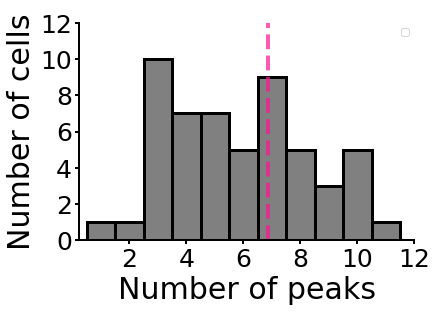

In [18]:
fig, ax = plt.subplots(figsize=[6,4])

percent_cells_fgf.plot.bar(rot=0, subplots=True, color='grey', edgecolor='black', 
                           linewidth=3, width=1, ax=ax, alpha=1)

plt.axvline(np.mean(n_peaks_fgf), linewidth=4, color='deeppink', alpha=0.7, 
           linestyle='dashed')

plt.xticks(np.arange(1,13,2), np.arange(2,14,2), fontsize=25)
plt.yticks(fontsize=25)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=30)
plt.ylabel('Number of cells', fontsize=30)
plt.ylim([0, 12])
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

#fig.savefig('../Data/Figure 2/Figure 2 - In vitro/Results/PeakHistogram-invitro.pdf', format='pdf', bbox_inches='tight')

#print('Mean: %g'%np.average(np.arange(1,10,1), weights=percent_cells_pd2['Total %']))
#print('Standard Deviation: %g'%np.sqrt(np.cov(np.arange(1,10,1), aweights=percent_cells_pd2['Total %'])))

## Manual peak selection

To be compared with the automatic. Use automatic as a reference but perform the curations which appear appropiate. 

### Maximum peak selector

In [8]:
%matplotlib

tr = 10

intensities = []
inds = []
peaks = []

for i in range(n_cells):
    
    if label[i] == 'fgf' or label[i] == 'psm4':
    
        looping = data_looping[i][~np.isnan(data_looping[i])]
        intensities.append(looping)
        inds.append(i)
        
        fig = plt.figure(figsize=[10,9])
        plt.plot(np.arange(len(looping))*tr, looping, linewidth=3, color='k')

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('Time [min]', fontsize=25)
        plt.ylabel('Intensity', fontsize=25)
        plt.title('Cell # %d'%(i+1), fontsize=30)
        
        plt.ylim([1000,2500])

        plt.xticks(np.arange(0, 1200, 400), fontsize=14)
        plt.yticks(np.arange(1000, 2750, 500), fontsize=14)
        #plt.set_xticks(np.arange(0,150,25))
        plt.xlim([-10,1200])
        
        #ax.tick_params(width=2, length=4)
        #ax.spines['top'].set_linewidth(0)
        #ax.spines['bottom'].set_linewidth(2)
        #ax.spines['left'].set_linewidth(2)
        #ax.spines['right'].set_linewidth(0)
        
        points = plt.ginput(n=-1, timeout=0, mouse_add=1, mouse_pop=3, mouse_stop=2)
        peaks.append(points)

        plt.close(fig)


Using matplotlib backend: MacOSX


### Rearrange peaks and maxima for each cell

In [11]:
len(peaks)

98

In [24]:
peak_time = []
max_val = []
count = 0

for i in range(n_cells):
    if label[i] == 'fgf' or label[i] == 'psm4':
        x = []
        y = []
        for j in range(len(peaks[count])):
            x.append(peaks[count][j][0])
            y.append(peaks[count][j][1])
        count += 1
        peak_time.append(x)
        max_val.append(y)

In [12]:
peak_time = []
max_val = []
count = 0

for i in range(len(peaks)):
    x = []
    y = []
    for j in range(len(peaks[i])):
        x.append(peaks[i][j][0])
        y.append(peaks[i][j][1])
    count += 1
    peak_time.append(x)
    max_val.append(y)

In [13]:
np.save('../Data/FGF/peak_time_max.npy', peak_time)
np.save('../Data/FGF/max_val.npy', max_val)

### Plot the results

In [14]:
peak_time_max = np.load('../Data/FGF/peak_time_max.npy', allow_pickle=True)
max_val = np.load('../Data/FGF/max_val.npy', allow_pickle=True)

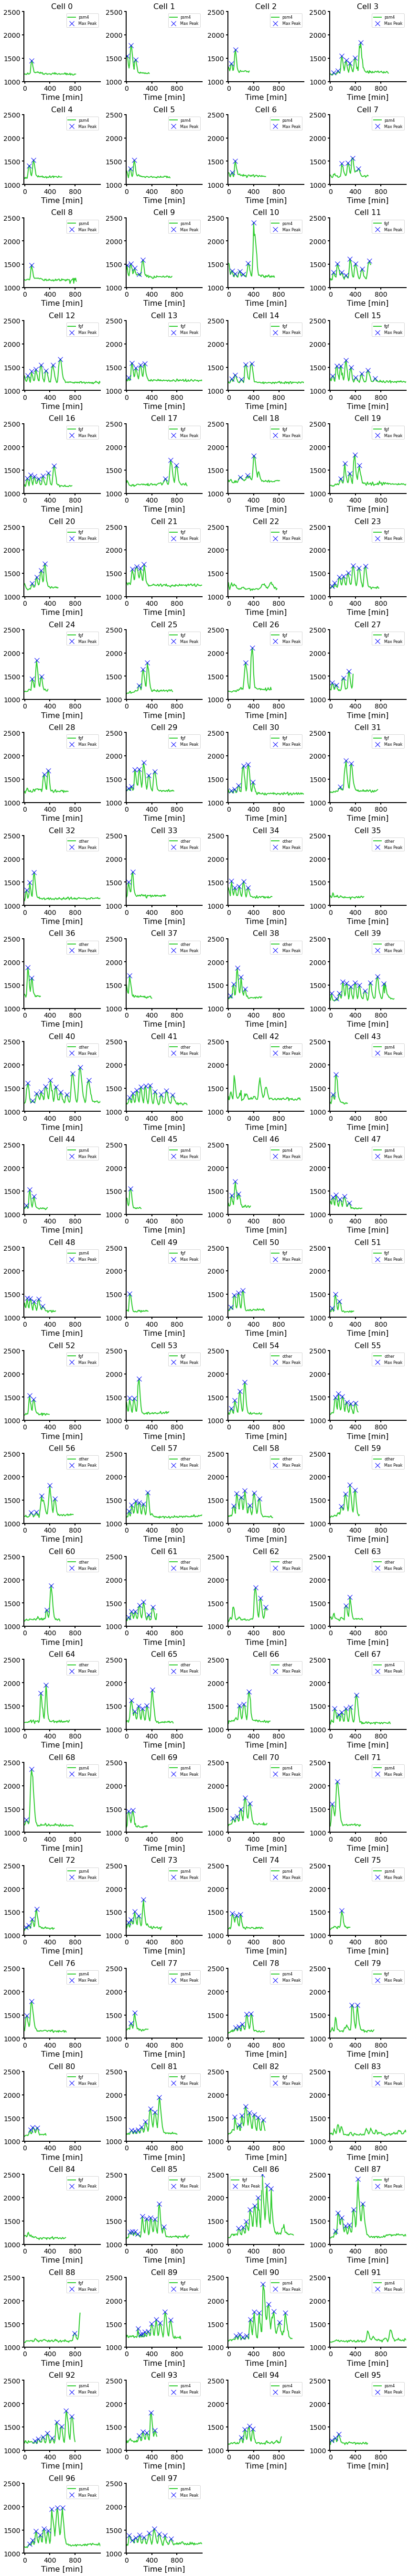

In [15]:
%matplotlib inline

tr = 10
n_cols =  4

n_cells_max = len(peak_time_max)
n_rows = np.ceil((n_cells_max + 1) / n_cols)
plot_num = 1

# Initialize the figure size
size_x = 3*n_cols
size_y = 3*n_rows

fig = plt.figure(figsize=[size_x,size_y])

intensities = []
for i in range(n_cells):
    
    if label[i] == 'fgf' or label[i] == 'psm4':
    
        looping = data_looping[i][~np.isnan(data_looping[i])]
        intensities.append(looping)

for i in range(n_cells_max):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1

    plt.plot(np.arange(len(intensities[i]))*tr, intensities[i], linewidth=2, color='limegreen', label=label[i])

    plt.plot(peak_time_max[i], max_val[i], "x", color='blue', markersize=10, label='Max Peak'); 

    plt.title('Cell %d'%(i), fontsize=16)
    plt.ylim([1000,2500])
    plt.legend(loc='best', fontsize=8)

    plt.xlabel('Time [min]', fontsize=16)
    plt.xticks(np.arange(0, 1200, 400), fontsize=14)
    plt.yticks(np.arange(1000, 2750, 500), fontsize=14)
    #plt.set_xticks(np.arange(0,150,25))
    plt.xlim([-10,1200])

    ax.tick_params(width=2, length=4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(0)
    
plt.tight_layout()
plt.show()   

### Manual curation


Once we check all the peaks, we decide whether we:

**(1)** keep the peaks as they are - we believe they are correctly detected

**(2)** exlucde the cell - we believe it has an abnormal behaviour

**(3)** modify the peaks - overall the behaviour looks ok but one ore more peaks are not correct


In [38]:
# Get all the indices of the cells we chose
inds = []

for i in range(n_cells):
    
    if label[i] == 'fgf' or label[i] == 'psm4':
        inds.append(i)

In [ ]:
exclude = [inds[22], inds[84]] #[36, 85, 89, 96]

modify = np.array([inds[36], inds[85], inds[88], inds[89], inds[96]]) #np.array([70, 78, 80, 81])-1

In [ ]:
%matplotlib

tr = 10

peaks = []

for i in inds:
    if np.size(np.where(i == modify)[0])>0:
    
        looping = data_looping[i][~np.isnan(data_looping[i])]

        fig = plt.figure(figsize=[6,5])
        plt.plot(np.arange(len(looping))*tr, looping, linewidth=3, color='k')

        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('Frames', fontsize=25)
        plt.ylabel('Intensity', fontsize=25)
        plt.title('Cell # %d'%(val), fontsize=30)

        plt.ylim([1000,2500])

        plt.xlabel('Time [min]', fontsize=16)
        plt.xticks(np.arange(0, 1200, 400), fontsize=14)
        plt.yticks(np.arange(1000, 2750, 500), fontsize=14)
        #plt.set_xticks(np.arange(0,150,25))
        plt.xlim([-10,1200])

        points = plt.ginput(n=-1, timeout=0, mouse_add=1, mouse_pop=3, mouse_stop=2)
        peaks.append(points)


        plt.close(fig)

In [ ]:
peak_time_m = []
max_val_m = []

for i in range(len(peaks)):
    x = []
    y = []
    for j in range(len(peaks[i])):
        x.append(peaks[i][j][0])
        y.append(peaks[i][j][1])
    count += 1
    peak_time_m.append(x)
    max_val_m.append(y)

In [ ]:
# Change the ones we just modified
for i,val in enumerate(modify):
    peak_time_max[inds[i]] = peak_time_m[i]
    max_val[inds[i]] = max_val_m[i]
    
# Make empty those we want to remove
for i,val in enumerate(exclude):
    peak_time_max[inds[i]] = []
    max_val[inds[i]] = []

In [ ]:
#np.save('../Data/FGF/peak_time_max_curated.npy', peak_time_max)
#np.save('../Data/FGF/max_val_curated.npy', max_val)

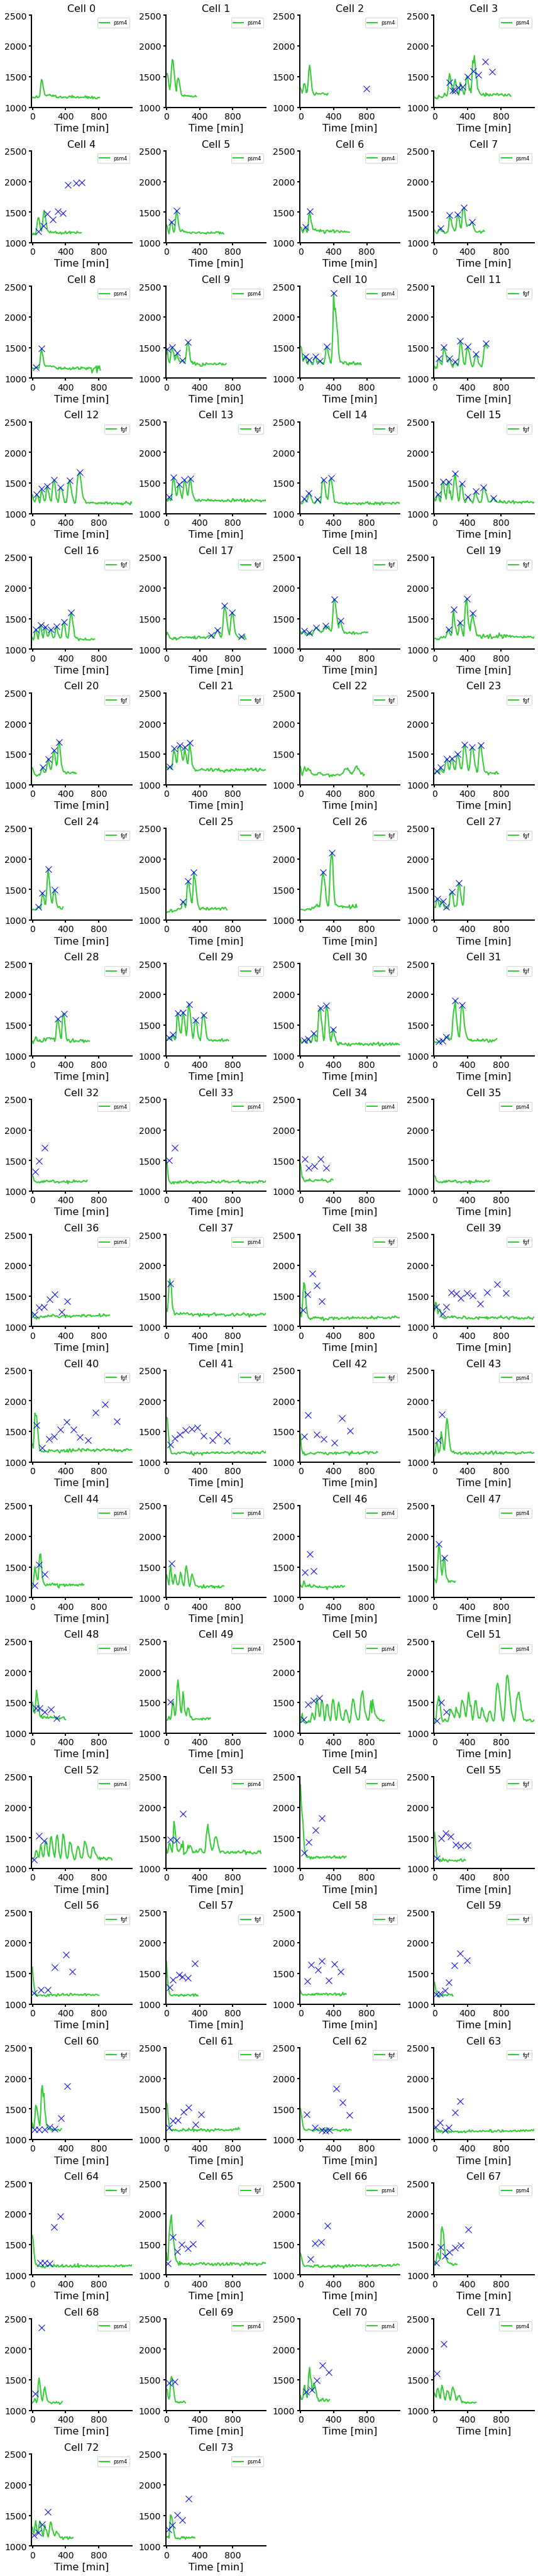

In [41]:
%matplotlib inline
tr = 10
n_cols =  4

n_rows = np.ceil((len(inds) + 1) / n_cols)
plot_num = 1

# Initialize the figure size
size_x = 3*n_cols
size_y = 3*n_rows

fig = plt.figure(figsize=[size_x,size_y])


count = 0


for i in range(len(inds)):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
    
    looping = data_looping[i][~np.isnan(data_looping[i])]
    
    plt.plot(np.arange(len(looping))*tr, looping, linewidth=2, color='limegreen', label=label[inds[i]])

    plt.plot(peak_time_max[i], max_val[i], "x", color='blue', markersize=10); 

    plt.title('Cell %d'%i, fontsize=16)
    plt.ylim([1000,2500])
    plt.legend(loc='best', fontsize=8)

    plt.xlabel('Time [min]', fontsize=16)
    plt.xticks(np.arange(0, 1200, 400), fontsize=14)
    plt.yticks(np.arange(1000, 2750, 500), fontsize=14)
    #plt.set_xticks(np.arange(0,150,25))
    plt.xlim([-10,1200])

    ax.tick_params(width=2, length=4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(0)
    
plt.tight_layout()
plt.show()   

### Peak analysis 

How many peaks each condition has? PSM4 control vs FGF

In [10]:
#peak_time_max = np.load('../Data/FGF/peak_time_max_curated.npy', allow_pickle=True)
#max_val = np.load('../Data/FGF/max_val_curated.npy', allow_pickle=True)

In [175]:
n_peaks_psm4 = []
n_peaks_fgf = []
inds = []
count = 0
n_cells = len(intensities)

for i in range(n_cells):
    
    if labels[i] == 'fgf':
        inds.append(i)
        n_peaks_fgf.append(len(peak_time_max[i]))
        count += 1
        
    elif labels[i] == 'psm4':
        inds.append(i)
        n_peaks_psm4.append(len(peak_time_max[i]))
        count += 1

In [176]:
print(f'There are {len(n_peaks_psm4)} PSM4 cells')

There are 44 PSM4 cells


In [177]:
print(f'There are {len(n_peaks_fgf)} PSM4 + FGF cells')

There are 54 PSM4 + FGF cells


In [192]:
n_peaks = [n_peaks_psm4, n_peaks_fgf]
percentage_all = []

for j in range(2):
    unique_peaks = np.unique(n_peaks[j])
    percentage = np.zeros(np.max(unique_peaks)+1)

    for i,val in enumerate(unique_peaks):
        percentage[val] = len(np.where(np.array(n_peaks[j]) == val)[0])
    
    percentage_all.append(percentage)

In [193]:
percent_cells_psm4 = pd.DataFrame({'Total': percentage_all[0]})
percent_cells_fgf = pd.DataFrame({'Total': percentage_all[1]})

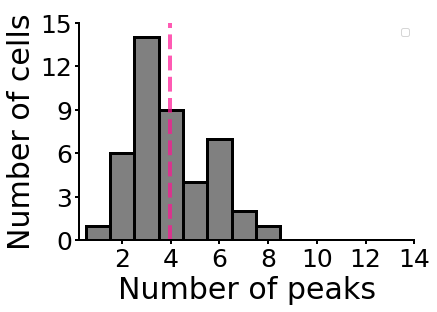

Mean: 2.977272727272727


In [194]:
%matplotlib inline
fig, ax = plt.subplots(figsize=[6,4])

percent_cells_psm4.plot.bar(rot=0, subplots=True, color='grey', edgecolor='black', 
                           linewidth=3, width=1, ax=ax, alpha=1)

plt.axvline(np.mean(n_peaks_psm4), linewidth=4, color='deeppink', alpha=0.7, 
           linestyle='dashed')

plt.xticks(np.arange(1,15,2), np.arange(2,16,2), fontsize=25)
plt.yticks(np.arange(0, 18, 3), fontsize=25)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=30)
plt.ylabel('Number of cells', fontsize=30)
plt.ylim([0, 15])
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

print(f'Mean: {np.mean(n_peaks_psm4)}')
#fig.savefig('../Data/Figure 2/Figure 2 - In vitro/Results/PeakHistogram-invitro.pdf', format='pdf', bbox_inches='tight')

#print('Mean: %g'%np.average(np.arange(1,10,1), weights=percent_cells_pd2['Total %']))
#print('Standard Deviation: %g'%np.sqrt(np.cov(np.arange(1,10,1), aweights=percent_cells_pd2['Total %'])))

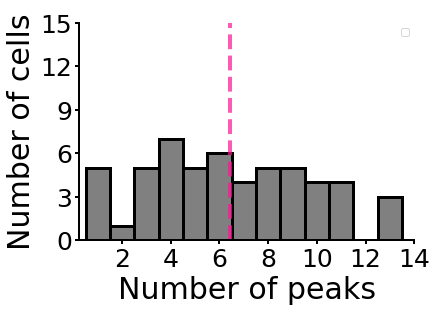

Mean: 5.425925925925926


In [195]:
fig, ax = plt.subplots(figsize=[6,4])

percent_cells_fgf.plot.bar(rot=0, subplots=True, color='grey', edgecolor='black', 
                           linewidth=3, width=1, ax=ax, alpha=1)

plt.axvline(np.mean(n_peaks_fgf), linewidth=4, color='deeppink', alpha=0.7, 
           linestyle='dashed')

plt.xticks(np.arange(1,15,2), np.arange(2,16,2), fontsize=25)
plt.yticks(np.arange(0, 18, 3), fontsize=25)
plt.legend([])
plt.xlabel('Number of peaks', fontsize=30)
plt.ylabel('Number of cells', fontsize=30)
plt.ylim([0, 15])
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.title(' ')
plt.show()

print(f'Mean: {np.mean(n_peaks_fgf)}')
#fig.savefig('../Data/Figure 2/Figure 2 - In vitro/Results/PeakHistogram-invitro.pdf', format='pdf', bbox_inches='tight')

#print('Mean: %g'%np.average(np.arange(1,10,1), weights=percent_cells_pd2['Total %']))
#print('Standard Deviation: %g'%np.sqrt(np.cov(np.arange(1,10,1), aweights=percent_cells_pd2['Total %'])))

### Select minima according to maxima

In [196]:
%matplotlib

tr = 10

peaks = []
for i in range(n_cells_max):
    
    fig = plt.figure(figsize=[10,9])

    plt.plot(np.arange(len(intensities[i]))*tr, intensities[i], linewidth=2, color='limegreen', label=label[i])

    plt.plot(peak_time_max[i], max_val[i], "x", color='blue', markersize=10, label='Max Peak'); 

    plt.title('Cell %d'%i, fontsize=16)
    plt.ylim([1000,2500])
    plt.legend(loc='best', fontsize=8)

    plt.xlabel('Time [min]', fontsize=16)
    plt.xticks(np.arange(0, 1200, 400), fontsize=14)
    plt.yticks(np.arange(1000, 2750, 500), fontsize=14)
    #plt.set_xticks(np.arange(0,150,25))
    plt.xlim([-10,1200])

    ax.tick_params(width=2, length=4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(0)
        
    points = plt.ginput(n=-1, timeout=0, mouse_add=1, mouse_pop=3, mouse_stop=2)
    peaks.append(points)

    plt.close(fig)

Using matplotlib backend: MacOSX


In [31]:
peak_time_min = []
min_val = []

for i in range(len(peaks)):
    x = []
    y = []
    for j in range(len(peaks[i])):
        x.append(peaks[i][j][0])
        y.append(peaks[i][j][1])
    
    peak_time_min.append(x)
    min_val.append(y)

In [32]:
np.save('../Data/FGF/peak_time_min.npy', peak_time_min)
np.save('../Data/FGF/min_val.npy', min_val)

In [34]:
np.save('../Data/FGF/intensities.npy', intensities)
np.save('../Data/FGF/inds.npy', inds)

In [35]:
np.save('../Data/FGF/labels.npy', np.array(label)[np.array(inds)].tolist() )

In [8]:
labels = np.array(label)[np.array(inds)].tolist()

NameError: name 'inds' is not defined

### Plot the min and maxima values

In [5]:
peak_time_min = np.load('../Data/FGF/peak_time_min.npy', allow_pickle=True)
min_val = np.load('../Data/FGF/min_val.npy', allow_pickle=True)

In [6]:
intensities = np.load('../Data/FGF/intensities.npy', allow_pickle=True)

NameError: name 'labels' is not defined

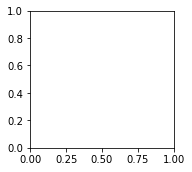

In [7]:
%matplotlib inline
tr = 10
n_cols =  6

n_cells = len(intensities)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1

# Initialize the figure size
size_x = 3*n_cols
size_y = 3*n_rows

fig = plt.figure(figsize=[size_x,size_y])


count = 0


for i in range(n_cells):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1

    plt.plot(np.arange(len(intensities[i]))*tr, intensities[i], linewidth=2, color='limegreen', label=labels[i])

    plt.plot(peak_time_max[i], max_val[i], "x", color='blue', markersize=10); 
    plt.plot(peak_time_min[i], min_val[i], "x", color='magenta', markersize=10); 

    plt.title('Cell %d'%i, fontsize=16)
    plt.ylim([1000,2500])
    plt.legend(loc='best', fontsize=8)

    plt.xlabel('Time [min]', fontsize=16)
    plt.xticks(np.arange(0, 1200, 400), fontsize=14)
    plt.yticks(np.arange(1000, 2750, 500), fontsize=14)
    #plt.set_xticks(np.arange(0,150,25))
    plt.xlim([-10,1200])

    ax.tick_params(width=2, length=4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(0)
    
plt.tight_layout()
plt.show()   

## Period and Amplitude analysis

In [197]:
n_cells = len(intensities)

periods = []
t_plus = []
t_minus = []

a_plus = []
a_minus = []
amplitudes = []

for i in range(n_cells):
    periods.append(np.diff(peak_time_max[i]))
    amplitudes.append(max_val[i][:-1])
    
    t_minus_aux = []
    t_plus_aux = []
    a_minus_aux = []
    a_plus_aux = []
    
    for j in range(len(peak_time_max[i])-1):
        
        t_minus_aux.append( peak_time_min[i][j] - peak_time_max[i][j] )
        t_plus_aux.append( peak_time_max[i][j+1] - peak_time_min[i][j] )
        
        a_minus_aux.append( max_val[i][j] - min_val[i][j] )
        a_plus_aux.append( max_val[i][j+1] - min_val[i][j] )
    
    t_minus.append(t_minus_aux)
    t_minus.append(t_plus_aux)
    
    a_minus.append(a_minus_aux)
    a_plus.append(a_plus_aux)

### Successive period and amplitude ratio

In [198]:
period_ratio = []
amplitude_ratio = []
label_ratio = []

for i in range(n_cells):
    if len(periods[i])>1:
        period_ratio.append( [periods[i][1+j]/periods[i][j] for j in range(len(periods[i])-1)] )
        amplitude_ratio.append( [amplitudes[i][1+j]/amplitudes[i][j] for j in range(len(amplitudes[i])-1)] )
        label_ratio.append(labels[i])

23


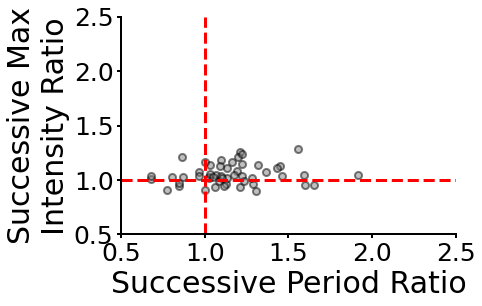

In [162]:
fig = plt.figure(figsize=[6,4])
n_cells = len(period_ratio)

count = 0

for i in range(n_cells):
    if label_ratio[i] == 'psm4':
        plt.scatter(period_ratio[i], amplitude_ratio[i], color='gray', s=50, linewidth=2, edgecolor='black', alpha=0.5)
        count += 1
print(count)
plt.axvline(1, linewidth=3, linestyle='dashed', color='red')
plt.axhline(1, linewidth=3, linestyle='dashed', color='red')

plt.xlim([0.5,2.5])
plt.ylim([0.5,2.5])
plt.xticks(np.arange(0.5,3, 0.5), fontsize=25)
plt.yticks(np.arange(0.5,3, 0.5),fontsize=25)

plt.xlabel('Successive Period Ratio', fontsize=30)
plt.ylabel('Successive Max\nIntensity Ratio', fontsize=30)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.show()

#fig.savefig('../Data/Figure 2/Figure 2 - In vitro/Results/SuccessivePeriod-Amplitude.pdf', format='pdf', bbox_inches='tight')



43


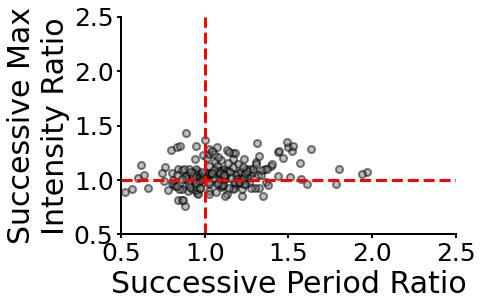

In [163]:
fig = plt.figure(figsize=[6,4])
n_cells = len(period_ratio)

count = 0
for i in range(n_cells):
    if label_ratio[i] == 'fgf':
        plt.scatter(period_ratio[i], amplitude_ratio[i], color='gray', s=50, linewidth=2, edgecolor='black', alpha=0.5)
        count += 1
print(count)

plt.axvline(1, linewidth=3, linestyle='dashed', color='red')
plt.axhline(1, linewidth=3, linestyle='dashed', color='red')

plt.xlim([0.5,2.5])
plt.ylim([0.5,2.5])
plt.xticks(np.arange(0.5,3, 0.5), fontsize=25)
plt.yticks(np.arange(0.5,3, 0.5),fontsize=25)

plt.xlabel('Successive Period Ratio', fontsize=30)
plt.ylabel('Successive Max\nIntensity Ratio', fontsize=30)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.show()

#fig.savefig('../Data/Figure 2/Figure 2 - In vitro/Results/SuccessivePeriod-Amplitude.pdf', format='pdf', bbox_inches='tight')




## Intensity plus

In [199]:
n_cells = len(intensities)
# Find maximum number of cycles
n_cycles = 0

for i in range(n_cells):
    if labels[i] == 'psm4':
        if len(a_minus[i]) > n_cycles:
            n_cycles = len(a_minus[i])
        
print(f'There are {n_cycles} maximum')

There are 6 maximum


In [ ]:
a_minus_

In [200]:
# Arrange in terms of number of cycles
a_minus_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}
a_plus_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}

for i in range(len(a_plus)):
    if labels[i] == 'psm4':
        a_plus_cycle[len(a_plus[i])] = a_plus[i]
        a_minus_cycle[len(a_minus[i])] = a_minus[i]
    
# Convert into list arrays  
min_cycle = []
max_cycle = []

for i in range(n_cycles):
    min_cycle.append(np.array(a_minus_cycle[i+1]))
    max_cycle.append(np.array(a_plus_cycle[i+1]))

In [201]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

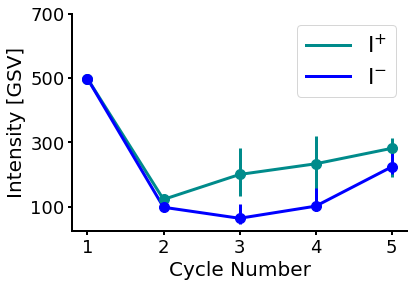

In [203]:
%matplotlib inline
# Plot
fig = plt.figure(figsize=[6,4])

# Maxima
max_nan = []
quartile1 = []
quartile3 = []
medians = []

for i in range(n_cycles-1):
    aux = max_cycle[i][~np.isnan(max_cycle[i])]
    max_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])

# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(max_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

# Plot ticks 
plt.xticks(np.arange(0,n_cycles-1,1), np.arange(1,n_cycles,1), fontsize=16);
plt.yticks(fontsize=16)
plt.xlabel('Number of cycles', fontsize=18)
plt.ylabel('Intensity [GSV]', fontsize=18)
#plt.ylim([0,40])

inds = np.arange(0, len(medians) )
plt.plot(inds,medians, color='darkcyan', linewidth=3, label=r'I$^{+}$')
plt.scatter(inds, medians, marker='o', color='darkcyan', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='darkcyan', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='blue', linestyle='-', lw=2)

# Minima
# Remove nans for violin plot
min_nan = []
quartile1 = []
quartile3 = []
medians = []

for i in range(n_cycles-1):
    aux = min_cycle[i][~np.isnan(min_cycle[i])]
    min_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(min_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(0, len(medians) )
plt.plot(inds, medians, color='blue', linewidth=3, label=r'I$^{-}$')
plt.scatter(inds, medians, marker='o', color='blue', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='blue', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='black', linestyle='-', lw=2)


plt.xticks(np.arange(0,n_cycles-1,1), np.arange(1,n_cycles,1), fontsize=18);
plt.legend(loc='best', fontsize=22)
plt.yticks(fontsize=18)
plt.xlabel('Cycle Number', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.yticks(np.arange(100,800,200))
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.show()

#fig.savefig('../Data/Figure 4/Figure 4 - In vitro/Results/MaxMinAmplitude-Bycycle.pdf', format='pdf',bbox_inches='tight')

### FGF A+ vs A-

In [204]:
n_cells = len(intensities)
# Find maximum number of cycles
n_cycles = 0

for i in range(n_cells):
    if labels[i] == 'fgf':
        if len(a_minus[i]) > n_cycles:
            n_cycles = len(a_minus[i])
        
print(f'There are {n_cycles} maximum')

There are 11 maximum


In [212]:
# Arrange in terms of number of cycles
a_minus_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}
a_plus_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}

for i in range(len(a_plus)):
    if labels[i] == 'fgf':
        a_plus_cycle[len(a_plus[i])] = a_plus[i]
        a_minus_cycle[len(a_minus[i])] = a_minus[i]
    
# Convert into list arrays  
min_cycle = []
max_cycle = []

for i in range(n_cycles):
    min_cycle.append(np.array(a_minus_cycle[i+1]))
    max_cycle.append(np.array(a_plus_cycle[i+1]))

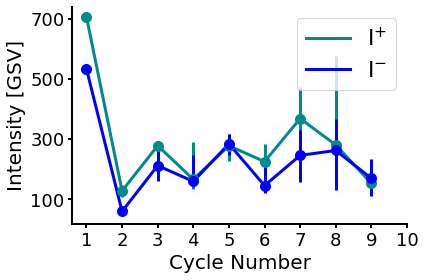

In [214]:
# Plot
fig = plt.figure(figsize=[6,4])

# Maxima
max_nan = []
quartile1 = []
quartile3 = []
medians = []

n = 2
for i in range(n_cycles-n):
    aux = max_cycle[i][~np.isnan(max_cycle[i])]
    max_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])

# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(max_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

# Plot ticks 
plt.xticks(np.arange(0,n_cycles-1,1), np.arange(1,n_cycles,1), fontsize=16);
plt.yticks(fontsize=16)
plt.xlabel('Number of cycles', fontsize=18)
plt.ylabel('Intensity [GSV]', fontsize=18)
#plt.ylim([0,40])

inds = np.arange(0, len(medians) )
plt.plot(inds,medians, color='darkcyan', linewidth=3, label=r'I$^{+}$')
plt.scatter(inds, medians, marker='o', color='darkcyan', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='darkcyan', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='blue', linestyle='-', lw=2)

# Minima
# Remove nans for violin plot
min_nan = []
quartile1 = []
quartile3 = []
medians = []

for i in range(n_cycles-n):
    aux = min_cycle[i][~np.isnan(min_cycle[i])]
    min_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(min_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(0, len(medians) )
plt.plot(inds, medians, color='blue', linewidth=3, label=r'I$^{-}$')
plt.scatter(inds, medians, marker='o', color='blue', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='blue', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='black', linestyle='-', lw=2)


plt.xticks(np.arange(0,n_cycles-1,1), np.arange(1,n_cycles,1), fontsize=18);
plt.legend(loc='best', fontsize=22)
plt.yticks(fontsize=18)
plt.xlabel('Cycle Number', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.yticks(np.arange(100,800,200))
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.show()

#fig.savefig('../Data/Figure 4/Figure 4 - In vitro/Results/MaxMinAmplitude-Bycycle.pdf', format='pdf',bbox_inches='tight')

## Period

In [222]:
n_cells = len(intensities)
# Find maximum number of cycles
n_cycles = 0

for i in range(n_cells):
    if labels[i] == 'psm4':
        if len(a_minus[i]) > n_cycles:
            n_cycles = len(a_minus[i])
        
print(f'There are {n_cycles} maximum')

There are 6 maximum


In [223]:
# Arrange in terms of number of cycles
periods_by_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}

for i in range(len(periods)):
    if labels[i] == 'psm4':
        periods_by_cycle[len(periods[i])] = periods[i]
    
# Convert into list arrays  
period_cycle = []

for i in range(n_cycles):
    period_cycle.append(np.array(periods_by_cycle[i+1]))

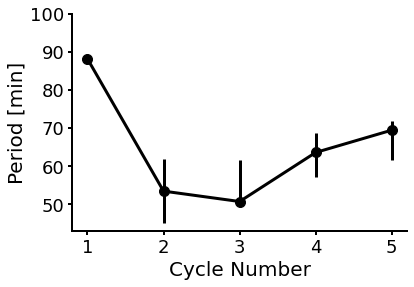

In [224]:
# Plot

fig = plt.figure(figsize=[6,4])


# Maxima
period_nan = []
quartile1 = []
quartile3 = []
medians = []
period_cycle_aux = period_cycle.copy()

for i in range(n_cycles-1):
    aux = period_cycle_aux[i][~np.isnan(period_cycle_aux[i])]
    period_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(period_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]



inds = np.arange(0, len(medians) )
plt.plot(inds,medians, color='black', linewidth=3, label='Max Amp')
plt.scatter(inds, medians, marker='o', color='black', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='black', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='red', linestyle='-', lw=3)



plt.xticks(np.arange(0,n_cycles-1,1), np.arange(1,n_cycles,1), fontsize=18);
plt.yticks(np.arange(50,110,10), fontsize=18)
plt.xlabel('Cycle Number', fontsize=20)
plt.ylabel('Period [min]', fontsize=20)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.show()

#fig.savefig('../Data/Figure 4/Figure 4 - In vitro/Results/Periods-Bycycle.pdf', format='pdf', bbox_inches='tight')

### FGF

In [225]:
n_cells = len(intensities)
# Find maximum number of cycles
n_cycles = 0

for i in range(n_cells):
    if labels[i] == 'fgf':
        if len(a_minus[i]) > n_cycles:
            n_cycles = len(a_minus[i])
        
print(f'There are {n_cycles} maximum')

There are 11 maximum


In [226]:
# Arrange in terms of number of cycles
periods_by_cycle = {new_list: [] for new_list in range(1,n_cycles+1,)}

for i in range(len(periods)):
    if labels[i] == 'fgf':
        periods_by_cycle[len(periods[i])] = periods[i]
    
# Convert into list arrays  
period_cycle = []

for i in range(n_cycles):
    period_cycle.append(np.array(periods_by_cycle[i+1]))

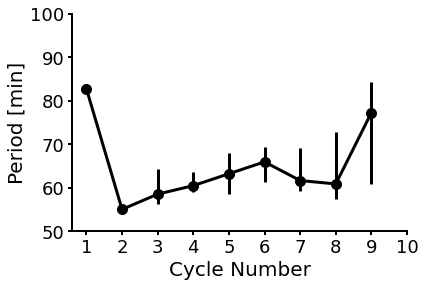

In [228]:
# Plot

fig = plt.figure(figsize=[6,4])


# Maxima
period_nan = []
quartile1 = []
quartile3 = []
medians = []
period_cycle_aux = period_cycle.copy()
n = 2
for i in range(n_cycles-n):
    aux = period_cycle_aux[i][~np.isnan(period_cycle_aux[i])]
    period_nan.append(aux)
    quartile1.append(np.percentile(aux, [25, 50, 75])[0])
    medians.append(np.percentile(aux, [25, 50, 75])[1])
    quartile3.append(np.percentile(aux, [25, 50, 75])[2])


# Add medians
whiskers = np.array([adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(period_nan, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]



inds = np.arange(0, len(medians) )
plt.plot(inds,medians, color='black', linewidth=3, label='Max Amp')
plt.scatter(inds, medians, marker='o', color='black', s=100, zorder=3)
plt.vlines(inds, quartile1, quartile3, color='black', linestyle='-', lw=3)
#plt.vlines(inds, whiskersMin, whiskersMax, color='red', linestyle='-', lw=3)



plt.xticks(np.arange(0,n_cycles-1,1), np.arange(1,n_cycles,1), fontsize=18);
plt.yticks(np.arange(50,110,10), fontsize=18)
plt.xlabel('Cycle Number', fontsize=20)
plt.ylabel('Period [min]', fontsize=20)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.show()

#fig.savefig('../Data/Figure 4/Figure 4 - In vitro/Results/Periods-Bycycle.pdf', format='pdf', bbox_inches='tight')